In [ ]:
#Import the essential library
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#Reading the file and storing it in data variable
with open('out.dump.npt.lammpstrj','r') as f:
    data=f.readlines()
number_atoms=int(data[3].strip())



#Initialize the Parameter
number_of_bins=200
number_of_frames=100

#Distance between Two atoms defined
def distance_between_two_atoms(i,j,box_size):
    distance_x=abs(i[0]-j[0])
    distance_x=min(distance_x,abs(box_size-distance_x))
    distance_y=abs(i[1]-j[1])
    distance_y=min(distance_y,abs(box_size-distance_y))
    distance_z=abs(i[2]-j[2])
    distance_z=min(distance_z,abs(box_size-distance_z))
    return np.lib.scimath.sqrt(distance_x**2+distance_y**2+distance_z**2)

#Get Coordinates from the start and end level
def get_coordinates(data,start,end,box_size):
    coordinates=[]
    for k in data[start:end]:
        l=k.split()
        if int(l[1])==1:
                coordinates.append([float(l[2])*box_size,float(l[3])*box_size,float(l[4])*box_size])
    return coordinates

#get box size
def get_box_size(data,i):
    l=data[i].split()
    return float(l[1])-float(l[0])


#Get the distribution from the data
def distribution():
    distribution_data=np.zeros(number_of_bins)
    box_set=[]
    increment_set=[]
    for k in range(0,number_of_frames):
        start=k*number_atoms+(k+1)*9
        end=start+number_atoms
        coordinates=[]
        box_size=get_box_size(data,start-2)
        box_set.append(box_size)
        increment=box_size/(2*number_of_bins)
        increment_set.append(increment)
        coordinates=get_coordinates(data,start,end,box_size)
        particles=len(coordinates)
        for i in range(particles-1):
            for j in range(i+1,particles):
                distance=distance_between_two_atoms(coordinates[i],coordinates[j],box_size)
                if distance<(box_size/2):
                    ig=int(distance/increment)
                    distribution_data[ig]=distribution_data[ig]+2
    return distribution_data,box_set,increment_set

distribution_data,box_set,increment_set=distribution()
avg_box_size=sum(box_set)/len(box_set)
avg_increment=sum(increment_set)/len(increment_set)


#Normalisation of the distribution
for i in range(number_of_bins):
    distribution_data[i]=distribution_data[i]/10

for i in range(number_of_bins):
    r1=i*avg_increment
    r2=r1+avg_increment
    volume_bin=(r2**3-r1**3)*(4/3)*(sp.pi)
    density_bin=(number_atoms)/(avg_box_size**3)
    nid=volume_bin*density_bin
    distribution_data[i]=distribution_data[i]/nid
    distribution_data[i]=distribution_data[i]/number_atoms
    distribution_data[i]=distribution_data[i]/number_of_frames

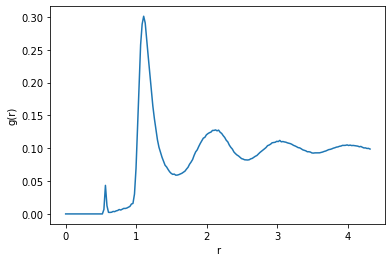

In [6]:
#Plot the distribution graph
radius_from_origin=np.linspace(0.0,number_of_bins*avg_increment,number_of_bins)

plt.xlabel('r')
plt.ylabel('g(r)')
plt.plot(radius_from_origin,distribution_data)
plt.show()

In [16]:
#Open and Read the system generated rdf file
with open('systemnvt.rdf','r') as f:
    system_data=f.readlines()

In [30]:
x_first1lack=[]
y_first1lack=[]
x_second1lack=[]
y_second1lack=[]
def get_system_coordinates(system_data,start,end):
    if start==4:
        for i in system_data[start:end]:
            m=i.split()
            x_first1lack.append(float(m[1]))
            y_first1lack.append(float(m[2]))
    else:
        for i in system_data[start:end]:
            k=i.split()
            x_second1lack.append(float(k[1]))
            y_second1lack.append(float(k[2]))
get_system_coordinates(system_data,4,104)
get_system_coordinates(system_data,105,205)

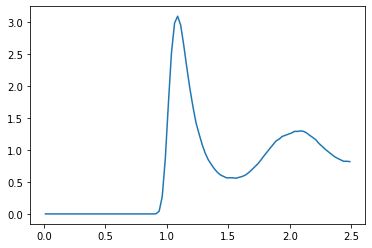

RDF Graph through Lammps generated for first 1 lakh output


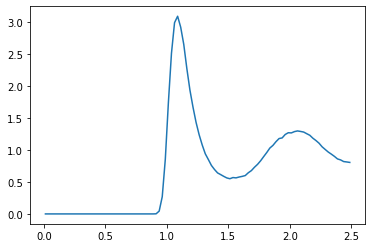

RDF Graph through Lammps generated for second 1 lakh ouput


In [31]:
#Import library for the plot
import matplotlib.pyplot as plt
plt.plot(x_first1lack,y_first1lack)
plt.show()
print("RDF Graph through Lammps generated for first 1 lakh output")
plt.plot(x_second1lack,y_second1lack)
plt.show()
print("RDF Graph through Lammps generated for second 1 lakh ouput")

In [2]:
with open('msd.lammps','r') as f:
    msd_data=f.readlines()

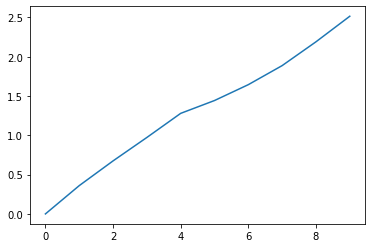

In [3]:
#Getting the value through the index
def get_msd_value(msd_data,i):
    l=msd_data[i].split()
    return float(l[7])
#Defining the msd function according to the data obtained
def msd(msd_data):
    msd_set=[]
    for i in range(0,190,10):
        base_value=get_msd_value(msd_data,i)
        msd_value=[]
        for j in range(i,i+10):
            msd_value.append(get_msd_value(msd_data,j)-base_value)
        msd_set.append(msd_value)
    avg_msd=[]
    for i in range(10):
        sum=0
        for j in range(len(msd_set)):
            sum+=msd_set[j][i]
        avg_msd.append(sum/len(msd_set))
    #Plotting the graph for the msd
    import matplotlib.pyplot as plt
    plt.plot(avg_msd)
    plt.show()
msd(msd_data)